In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Skalowania danych

- Pamiętaj aby zawsze uczyć parametry skalowania na trainie a nie na całym zbiorze danych bo inaczej popełniasz błąd metodologiczny.

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# get the data
X = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

* Zobaczmy efekt użycia StandardScaler oraz SVC. 

* Najpierw wykonajmy SVC na oryginalnych danych dla porównania:

In [5]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=5) 
svm = SVC()
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.95


Teraz przeskalujmy dane za pomocą StandardScaler przed dopasowaniem SVC:

In [6]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format( svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


Efekt skalowania danych jest dość znaczący. Mimo że skalowanie danych nie wiąże się z żadną skomplikowaną matematyką, dobrą praktyką jest używanie mechanizmów skalowania dostarczanych przez scikit-learn zamiast samodzielnego ich klepać.

# Zad. 

Wykonaj podobny eksperyment na 

```python
datasets.load_wine()
```

Test set accuracy on original data: 0.56
Scaled test set accuracy: 1.00


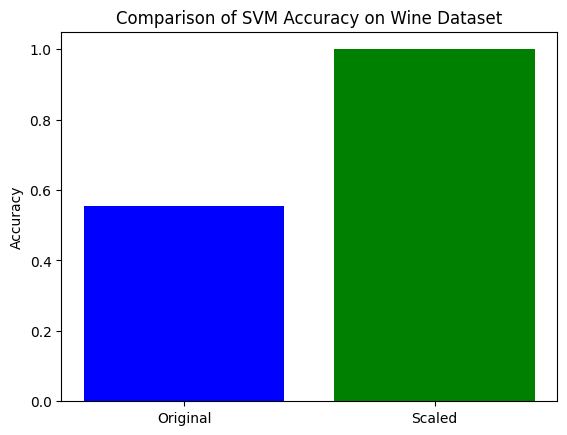

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

svm = SVC()
svm.fit(X_train, y_train)
original_accuracy = svm.score(X_test, y_test)
print(f"Test set accuracy on original data: {original_accuracy:.2f}")

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
scaled_accuracy = svm.score(X_test_scaled, y_test)
print(f"Scaled test set accuracy: {scaled_accuracy:.2f}")

plt.bar(['Original', 'Scaled'], [original_accuracy, scaled_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Accuracy on Wine Dataset')
plt.show()
